# 2 Regularized logistic regression

## 2.1 Visualizing the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('data/ex2data2.txt', delimiter=',')
data[:5, :]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [3]:
X = data[:, 0:2] # results of test1 and test2
X[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [4]:
Y = data[:, 2] # pass/fail QA test
Y[:5]

array([ 1.,  1.,  1.,  1.,  1.])

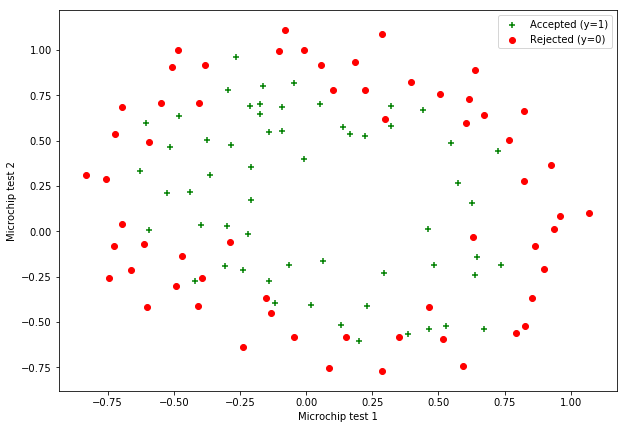

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='g', marker='+')
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='r', marker='o')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend(['Accepted (y=1)','Rejected (y=0)'])
plt.show()

## 2.2 Feature mapping

In [6]:
def mapFeature(X1, X2):    
    '''
    mapFeature(X1, X2) maps the two input features to polynomial features.

    Returns a new feature array with more features, comprising 
    1, X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Inputs X1, X2 must be the same size.
    '''

    m = X1.shape[0] # number of training examples
    out = np.ones(m) # column of ones for the intercept
    degree = 6
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            out = np.column_stack((out, (X1**(i-j) * X2**(j))))
                                  
    return out

In [7]:
X = mapFeature(X[:, 0], X[:, 1])

In [8]:
X.shape

(118, 28)

In [9]:
X[:1]

array([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01,
          2.62830529e-03,   3.58643425e-02,   4.89384194e-01,
          1.34745327e-04,   1.83865725e-03,   2.50892595e-02,
          3.42353606e-01,   6.90798869e-06,   9.42624411e-05,
          1.28625106e-03,   1.75514423e-02,   2.39496889e-01,
          3.54151856e-07,   4.83255257e-06,   6.59422333e-05,
          8.99809795e-04,   1.22782870e-02,   1.67542444e-01,
          1.81563032e-08,   2.47750473e-07,   3.38066048e-06,
          4.61305487e-05,   6.29470940e-04,   8.58939846e-03,
          1.17205992e-01]])

## 2.3 Cost function and gradient

In [10]:
import math

def sigmoid(z):
    g = 1. / (1. + math.exp(-z))
    return g

# Vectorize sigmoid function so it works on all elements of a numpy array
sigmoid = np.vectorize(sigmoid)

In [11]:
def costFunctionReg(theta, X, Y, Lambda):
    '''
    costFunctionReg(theta, X, Y, Lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    '''
    
    # Cost
    m = len(Y) # number of training examples
    n = X.shape[1] # number of features
    J1 = 0
    J2 = 0
    J = 0
    grad = np.zeros(theta.shape)
    
    for i in range(m):
        z = np.dot(theta.T, X[i])
        J1 += -Y[i]*math.log(sigmoid(z)) - (1 - Y[i])*math.log((1 - sigmoid(z)))
    J1 = J1/m
        
    for j in range(1, n):
        J2 += theta[j]**2
    J2 = J2*Lambda/(2*m)

    J = J1 + J2
    
    
    # Gradient
    grad = np.zeros(theta.shape)
    
    for j in range(n):
        for i in range(m):
            z = np.dot(theta.T, X[i])
            grad[j] += (sigmoid(z) - Y[i]) * X[i,j]
        grad[j] = grad[j]/m
        
        if j > 0:
            grad[j] += Lambda/m * theta[j]

    
    return J, grad

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter Lambda to 1
Lambda = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, Y, Lambda);

In [13]:
print('Cost at initial theta:\n', cost)
print('Expected cost (approx):\n 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n', grad[:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta:
 [ 0.69314718]
Expected cost (approx):
 0.693

Gradient at initial theta (zeros) - first five values only:
 [[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [14]:
# Compute and display cost and gradient with theta = ones and Lambda = 10
test_theta = np.ones((X.shape[1], 1))
cost, grad = costFunctionReg(test_theta, X, Y, 10);

print('\nCost at test theta (with lambda = 10):\n', cost)
print('Expected cost (approx):\n 3.16\n')
print('Gradient at test theta - first five values only:\n', grad[:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10):
 [ 3.16450933]
Expected cost (approx):
 3.16

Gradient at test theta - first five values only:
 [[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### 2.3.1 Learning parameters using fminunc

We're supposed to use Octave's `fminunc` function for this. I can't find a python implementation of this, so let's use `scipy.optimize.minimize(method='TNC')` instead.

In [15]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
Lambda = 1

In [16]:
from scipy.optimize import minimize

res = minimize(fun=costFunctionReg, x0=initial_theta, args=(X, Y, Lambda),
               method='TNC', jac=True, options={'maxiter':400})

res

     fun: 0.52900272996451636
     jac: array([ -2.15184943e-06,   6.79355588e-07,  -3.49179246e-07,
         8.75695659e-07,  -4.06664529e-08,  -9.33679142e-07,
        -5.14421247e-07,   1.69451183e-08,   1.54005826e-08,
        -9.72712612e-07,   6.94720783e-08,   3.55328497e-08,
        -2.79992696e-07,   1.79683731e-07,   2.33129715e-07,
         1.47138663e-07,  -2.12233439e-07,   6.16769943e-07,
        -9.26142327e-08,  -5.27902641e-08,  -1.48168520e-06,
         2.31328945e-07,   1.80337896e-07,  -1.31415701e-07,
        -7.17875932e-08,  -4.12210491e-07,   1.66132971e-08,
        -7.34979879e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271026,  0.62529964,  1.18111686, -2.01987399, -0.91743188,
       -1.43166927,  0.12393228, -0.36553119, -0.35725404, -0.17516291,
       -1.4581701 , -0.05098418, -0.61558559, -0.27469165, -1.19271298,
       -0.24217841, -0.20603303, -0.04466178, -0.27778948, -0.29

In [17]:
theta = res.x

## 2.4 Plotting the decision boundary

In [18]:
def plotDecisionBoundary(theta, X, Y):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[Y==1, 1], X[Y==1, 2], c='g', marker='P', label='Accepted (y=1)')
    plt.scatter(X[Y==0, 1], X[Y==0, 2], c='r', marker='o', label='Rejected (y=0)')
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')

    # Create grid
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    # Evaluate z = theta.X over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            # Create arrays of shape = (1,) from the elements of u, v
            # so that the m = X1.shape[0] line in mapFeature works
            u_array = np.array([u[i]])
            v_array = np.array([v[j]])
            z[i, j] = np.dot(mapFeature(u_array, v_array), theta)
    z = z.T
    
    # Plot z = 0 (i.e. boudnary between y=0 and y=1 cases)
    decision_boundary = plt.contour(u, v, z, 0, colors='b')
    decision_boundary.collections[0].set_label('Decision boundary')
    
    plt.xlim(min(X[:,1]-0.1),max(X[:,1])+0.1)
    plt.ylim(min(X[:,2]-0.1),max(X[:,2])+0.1)
    plt.legend()
    plt.show()

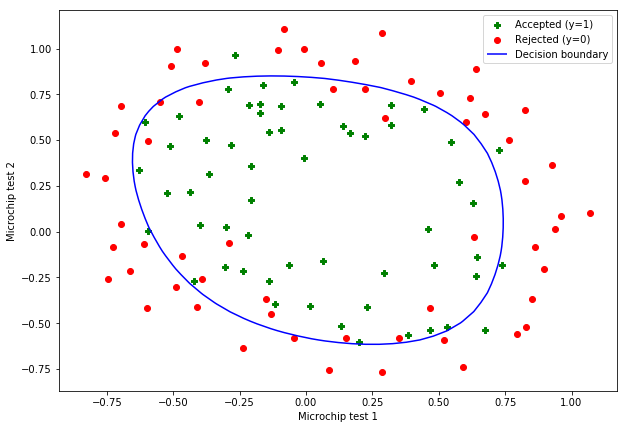

In [19]:
plotDecisionBoundary(theta, X, Y)

In [20]:
# Compute accuracy on our training set

def predict(theta, X):
    
    m = X.shape[0] # Number of training examples
    p = np.zeros(m)

    for i in range(m):
        prob = sigmoid(np.dot(X[i,:], theta))
        if prob >= 0.5:
            p[i] = 1 # Predict "Accepted" if prob >= 0.5
    
    return p

In [21]:
p = predict(theta, X)
m = X.shape[0]
accuracy = sum(p==Y) / m

print('Training accuracy:\n', accuracy * 100, '%')
print('Expected accuracy (approx):\n 83.1 %\n')

Training accuracy:
 83.0508474576 %
Expected accuracy (approx):
 83.1 %



## 2.5 Optional exercise: Demonstrating overfitting and underfitting using different regularisation parameters

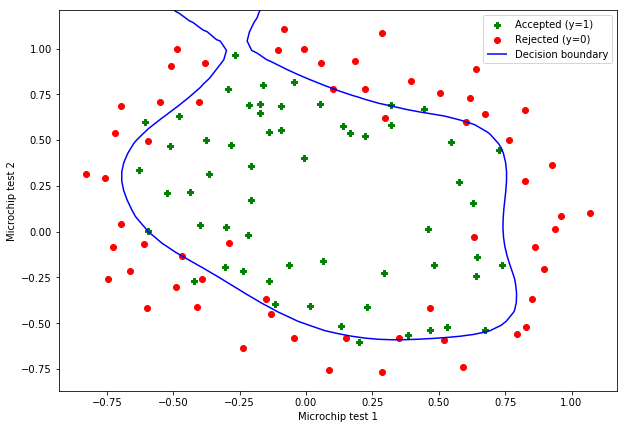

In [22]:
# Small Lambda leads to overfitting

Lambda = 0.0001

res = minimize(fun=costFunctionReg, x0=initial_theta, args=(X, Y, Lambda),
               method='TNC', jac=True, options={'maxiter':400})

theta = res.x
plotDecisionBoundary(theta, X, Y)

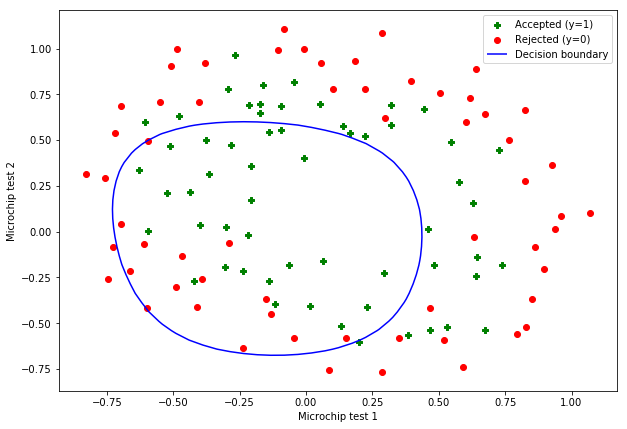

In [23]:
# Large Lambda leads to underfitting

Lambda = 100

res = minimize(fun=costFunctionReg, x0=initial_theta, args=(X, Y, Lambda),
               method='TNC', jac=True, options={'maxiter':400})

theta = res.x
plotDecisionBoundary(theta, X, Y)